<a href="https://colab.research.google.com/github/MonicaEN/Cognifyz-Internship/blob/main/Cognifyz_Technologies_Tasks_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a machine learning model to predict the
aggregate rating of a restaurant based on other features.

In [36]:
 # Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [37]:
# Load the Dataset
df = pd.read_csv('Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Data Analysis

In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [39]:
df.shape

(9551, 21)

In [40]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [41]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [42]:
df.dropna(inplace=True)

In [43]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'PIECHART')

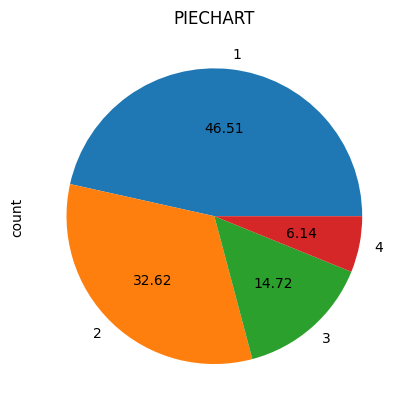

In [44]:
df['Price range'].value_counts().plot(kind='pie',autopct = '%.2f')
plt.title("PIECHART")

<Axes: xlabel='Price range', ylabel='Density'>

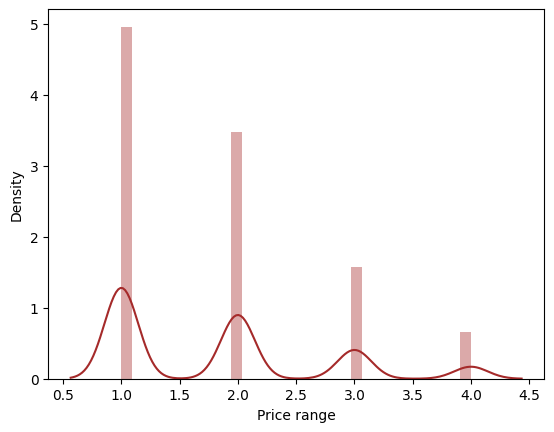

In [45]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(df['Price range'],color='brown')

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Has Table booking'] = label_encoder.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = label_encoder.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = label_encoder.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = label_encoder.fit_transform(df['Switch to order menu'])
df['Rating color'] = label_encoder.fit_transform(df['Rating color'])
df['Rating text'] = label_encoder.fit_transform(df['Rating text'])


<Axes: xlabel='Aggregate rating', ylabel='Count'>

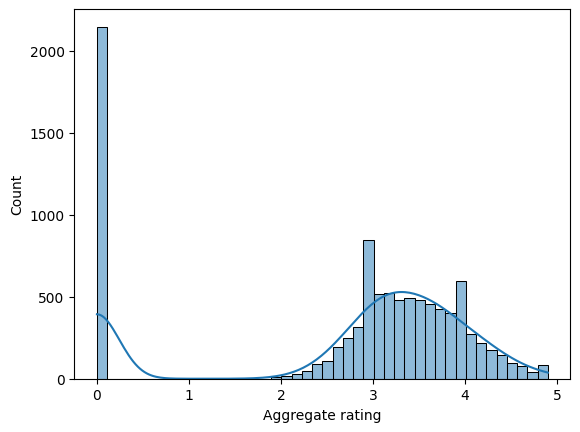

In [47]:
sns.histplot(df['Aggregate rating'], kde=True)

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

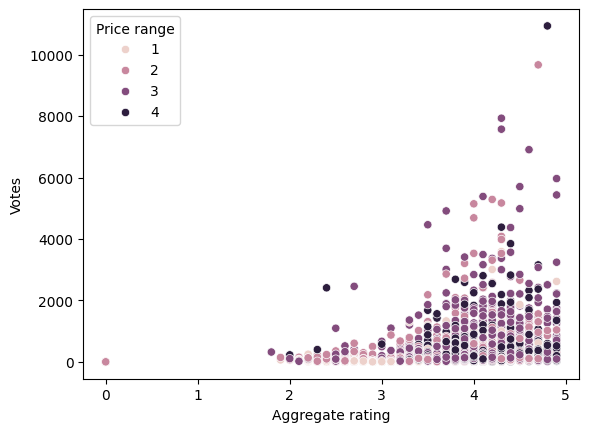

In [48]:
sns.scatterplot(x=df["Aggregate rating"],y=df["Votes"],hue=df["Price range"])

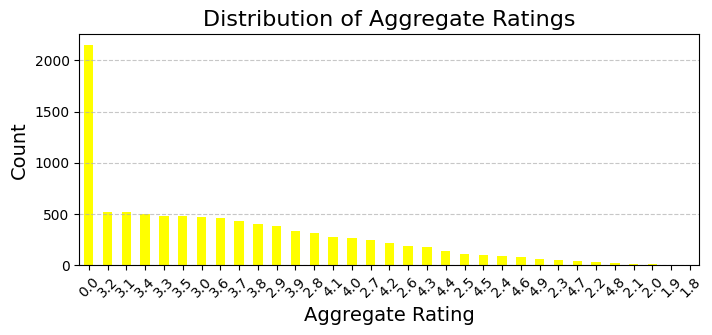

In [49]:
# Count the occurrences of each rating
rating_counts = df['Aggregate rating'].value_counts()

# Create a bar chart
plt.figure(figsize=(8,3))
rating_counts.plot(kind='bar', color='yellow')
plt.title('Distribution of Aggregate Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [50]:
df = df.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency'], axis=1)

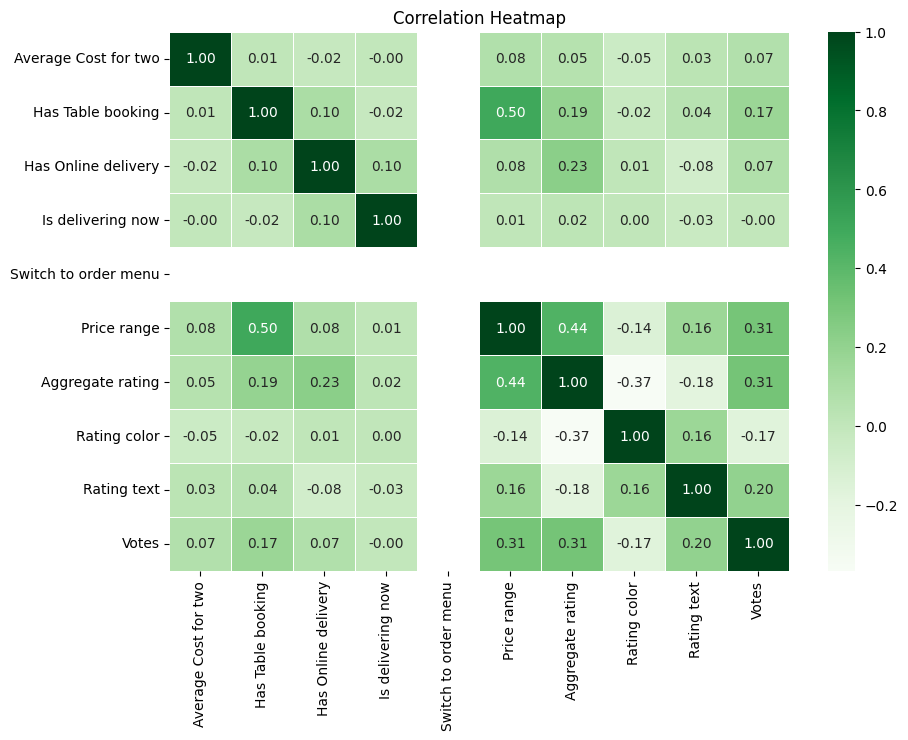

In [51]:
corrmatrix = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corrmatrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Features and Target

In [52]:
x = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

Split training and testing dataset

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

Linear Regression Model

In [54]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [55]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Error: {r2:.2f}")

Mean Squared Error (MSE): 1.42
R-squared (R2) Error: 0.39


In [56]:
xgb_model = XGBRegressor(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,       # Maximum depth of a tree
    random_state=42,   # Seed for reproducibility
    objective='reg:squarederror'  # Objective for regression
)

xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R2 Score: 0.99
Mean Squared Error: 0.03


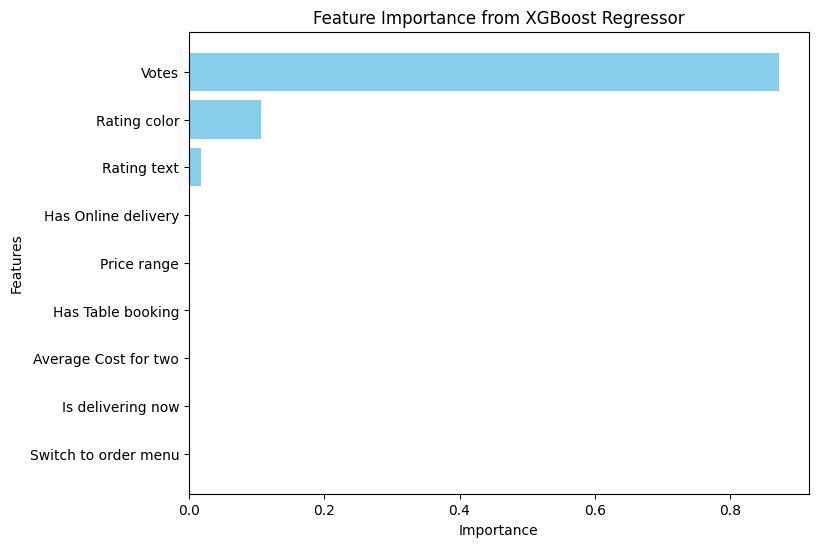

                Feature  Importance
8                 Votes    0.872681
6          Rating color    0.106769
7           Rating text    0.017156
2   Has Online delivery    0.001244
5           Price range    0.001047
1     Has Table booking    0.000665
0  Average Cost for two    0.000438
3     Is delivering now    0.000000
4  Switch to order menu    0.000000


In [60]:
# Extract feature importance
importance = xgb_model.feature_importances_
feature_importance = pd.DataFrame({"Feature": x.columns, "Importance": importance}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance from XGBoost Regressor")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# Display feature importance data
print(feature_importance)

Decision tree model

In [57]:
# Initialize and train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Predictions and evaluation
y_pred = model.predict(x_test)

In [58]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R2 Score: 0.98
Mean Squared Error: 0.06


Conclusion

An MSE of 0.03 shows that the model's predictions are highly precise with very low errors.  
R2 value of 0.99 suggests that the model is highly effective at explaining and predicting the target variable.  
The XGBoost Regressor model demonstrates outstanding performance on the test data, making it the most suitable option for this task.